In [77]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from env import host, password, user
from datetime import datetime as dt
from pydataset import data

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

Simulation Based Approach
Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
Theory: Our population is the 1000 tickets we have manufactured
Implementation: Create a boolean pandas Series
we model win with true and lose with false
because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


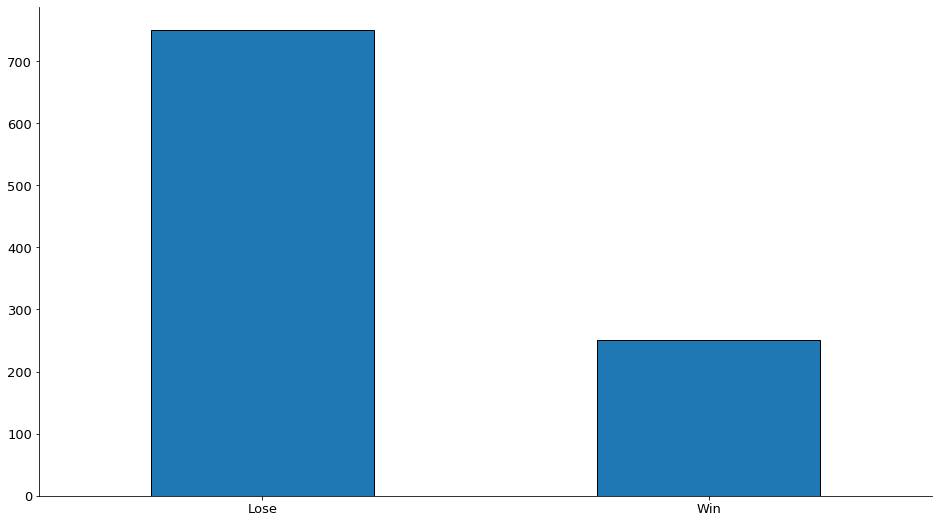

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

Scenario: Each student in a classroom is given a Golden Cody scratch off at random
Theory

We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

non-response: people that don't respond are a diff population
undercoverage: some groups aren't well represented
voluntary: people volunteer for surveys
leading questions
social desirability
Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [4]:
n = 25
tickets.sample(n).mean()

0.12

Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [5]:
iteration_of_students=[tickets.sample(n).mean() for _ in range(5)]
iteration_of_students

[0.28, 0.28, 0.08, 0.24, 0.36]

Theory

The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])

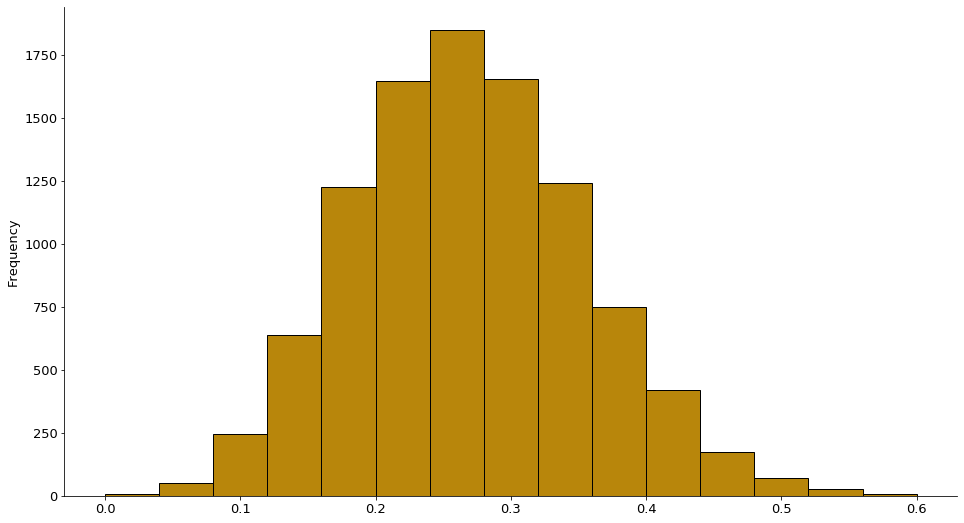

In [7]:
calculated_winrates.plot.hist(bins=15, color="DarkGoldenRod")

Theory

The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

Mini Exercise -- CLT
Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [8]:
r= 6
rolls = pd.DataFrame()
rolls["die1"] = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)


In [9]:
pd.Series([rolls.sample(r).mean() for _ in range (10_000)])

0            die1    4.5
dtype: float64
1            die1    4.0
dtype: float64
2       die1    4.333333
dtype: float64
3            die1    4.0
dtype: float64
4       die1    3.166667
dtype: float64
                     ...               
9995    die1    3.333333
dtype: float64
9996    die1    4.333333
dtype: float64
9997    die1    4.666667
dtype: float64
9998    die1    3.166667
dtype: float64
9999         die1    2.5
dtype: float64
Length: 10000, dtype: object

Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
the mean of the sampling distribution of the sample means will be the "true" mean
the variance of the sampling distribution is the population variable divided by the sample size
the standard deviation of the sampling distribution is pqn‾‾‾√ (for our example), aka the standard error

In [10]:
se = math.sqrt((.25 * .75) / n)


Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [11]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

confidence intervals for population parameter estimates (e.g. estimating the population mean)
as n goes up, interval becomes smaller
as certainty goes up, interval becomes larger
99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
hypothesis testing
One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [12]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

Null and Alternative Hypothesis
H0: status quo: no difference or no effect
Ha: alternative: there is a difference or effect
whether Ha is ≠, <, >, determines one-tailed vs two-tailed test
< or > == one-tailed
≠ == two-tailed
Hypothesis Testing Results
H0 is true	H0 is false
Fail to reject H0	TN	FN (Type II)
Reject H0	FP (Type I)	TP

# Mini Exercise -- Null + Alternate Hypothesis and Errors
For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.
<ul>
    <li>Are the average grades in web development vs data science classes different? </li>
    <li>Is there a relationship between how early a student shows up to class and their grade?</li>
    <li>Are web dev or data science students more likely to be coffee drinkers?</li>
    </ul>
   

# Null Hypothesis
<ol>
<li>Null hypothesis: There is no difference in grades between web development and data science classes. </li>
<li> Null hypothesis: There is no relationship between class arrival time and grades.</li>
<li> Null hypothesis: Neither web dev or data science students are more likely to drink coffee.</li>
    </ol>
    
    
# Alternative Hypothesis


<ol>
    <li>Alternative hypothesis: The data science students have a higher grade average than web dev students.</li>
<li>Alternative hypothesis: The students who arrive 15 minutes early are likely to have a higher grade average than those who arrive on time.</li>
<li>Alternative hypothesis: The web dev students are less likely to be coffee drinkers than data science students.</li>
    </ol>

# True Positive:
<ol>
    <li> The data science students have a higher grade average than web dev students.</li>
    <li> The students who arrive early to class have a higher grade average than those who arrive on time.</li>
    <li> The web dev students drink more coffee than data science students.</li>
        </ol>

# True Negative:
<ol>
    <li> The data science students have a lower grade average than web dev students.</li>
    <li> The students who arrive early to class have a lower grade average than those who arrive on time.</li>
    <li> The web dev students drink less coffee than data science students.</li>
        </ol>
        
# Type I error:
A type I error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
<ol>
    <li>Type I error occurred because the web dev class in Dallas was not counted.  </li>
    <li> Type I error occured because class time entry was not accurately recorded.</li>
    <li> Type I error occurred because some students were absent and they didn't give their coffee preference. </li>
 </ol>
     
# Type II Error
A type II error is when we fail to reject the null hypothesis when it is actually false.
<ol>
    <li> Type II error occured because all of the web dev grades are up to date but the data science grades are not </li>
    <li> The type II error occured because the grades had been given a curve. </li>
    <li> The web dev students thought coffee meant any caffeinated beverage and filled out the survey incorrectly. </li>
    </ol>

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
<ul>
    <li>Has the network latency gone up since we switched internet service providers? </li>
<li>Is the website redesign any good? </li>
    <li>Is our television ad driving more sales? </li>
</ul>

Rewording the questions:
<ul>
    <li> Has the network latency time improved since switching internet service providers? </li>
    <li> Has the website redesign generated more client click throughs? </li>
    <li> Since airing the new television ad, have we generated more new customer sales than before the new ad?</li>

# Null Hypothesis
<ol>
<li>Null hypothesis: There is no change in network latency since switching internet service providers. </li>
<li> Null hypothesis: There is no relationship between click throughs and new web design.</li>
<li> Null hypothesis: There has been no change in rate of new customer sales than before the new tv ad.</li>
    </ol>
# Alternative Hypothesis
<ol>
    <li>Alternative hypothesis: The network latency time has not improved since switching internet service providers.</li>
<li>Alternative hypothesis: There are less click throughs on the site since the new web design.</li>
<li>Alternative hypothesis: There are less new customer sales since the new ad has been aired on tv.</li>
    </ol>

# True Positive:
<ol>
    <li> There has been an improved latency time since switching internet service providers</li>
    <li> There are more click throughs on the site since the new web design.</li>
    <li> There are new customer sales since the new tv ad aired.</li>
        </ol>

# True Negative:
<ol>
     <li> There has not been an improved latency time since switching internet service providers</li>
    <li> There are less click throughs on the site since the new web design.</li>
    <li> There are less new customer sales since the new tv ad aired.</li>
        </ol>
        
# Type I error:
A type I error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
<ol>
    <li>Type I error occurred because the web dev class in Dallas was not counted.  </li>
    <li> Type I error occured because class time entry was not accurately recorded.</li>
    <li> Type I error occurred because some students were absent and they didn't give their coffee preference. </li>
 </ol>
     
# Type II Error
A type II error is when we fail to reject the null hypothesis when it is actually false.
<ol>
    <li> Type II error occured because all of the web dev grades are up to date but the data science grades are not </li>
    <li> The type II error occured because the grades had been given a curve. </li>
    <li> The web dev students thought coffee meant any caffeinated beverage and filled out the survey incorrectly. </li>
    </ol>

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [13]:
#H0: There is no difference in the time it takes to sell a home between the two offices.
#H1: There is a difference in the time it takes to sell the home between the two houses.
alpha=0.05
sample_1 = 40
sample_2 = 50
mean_1 = 90
mean_2 = 100
stddev1 = 15
stddev2 = 20

In [14]:
t_test= (mean_1-mean_2)/ (stddev1-stddev2)
t_test

2.0

In [91]:
p_test= 

p = (1 - t.cdf(abs(t_stat), df)) * 2

SyntaxError: invalid syntax (<ipython-input-91-89d94fc80c98>, line 1)

In [ ]:
from pydataset import data

In [ ]:
#Load the mpg dataset and use it to answer the following questions:
mpg = data('mpg')
mpg

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

Use the telco_churn data. Does tenure correlate with monthly charges? 
Total charges? 
What happens if you control for phone and internet service?

In [ ]:

telco= pd.read_csv("telco.csv")
telco.info()
# h0: There is no correlation between monthly tenure and monthly charges
# h1: The higher the monthly tenure, the higher the monthly charges.
# h2: The higher the monthly tenure, the lower the monthly charges.

In [ ]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [ ]:
#defining our variables for correlation
x = telco.monthly_tenure
y = telco.monthly_charges
#calculating our standard deviation
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return math.sqrt(variance)

In [ ]:
#calculating pearson correlation coefficient
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

In [ ]:
#calculating corresponding p value
t = (r_xy * (math.sqrt(n - 2)) / math.sqrt(1 - r_xy**2))
t
p = stats.t.sf(t, df=degf) * 2
p

In [ ]:
##comparing my p value against my α
p < α

In [ ]:
corr, p = stats.pearsonr(x, y)
corr, p

In [ ]:
r, p = stats.pearsonr(telco.monthly_tenure, telco.monthly_charges)

telco.plot.scatter('monthly_tenure', 'monthly_charges')
plt.title('Monthly Tenure vs Monthly Charges')
plt.text(8, 80, f'r = {r:.3f}')

In [ ]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [ ]:
#defining our variables for correlation
x = telco.monthly_tenure
b = telco.total_charges
#calculating our standard deviation
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return math.sqrt(variance)

In [ ]:
#calculating pearson correlation coefficient
r_xb = (((x - x.mean()) * (b- b.mean())).sum() / n) / (stdev(x) * stdev(b))
r_xb

In [ ]:
#calculating corresponding p value
t = (r_xb * (math.sqrt(n - 2)) / math.sqrt(1 - r_xb**2))
p = stats.t.sf(t, df=degf) * 2
p

In [ ]:
##comparing my p value against my α
p < α

In [ ]:
## removing nans
np.isnan(b).any()
b= np.nan_to_num(b)
corr, p = stats.pearsonr(x, b)
corr, p

In [ ]:
sns.relplot(data=telco, y='monthly_charges', x='monthly_tenure', col='phone')
phone_vs_total=sns.relplot(data=telco, y='total_charges', x='monthly_tenure', col='phone')

In [ ]:
sns.relplot(data=telco, y='monthly_charges', x='monthly_tenure', col='internet')
sns.relplot(data=telco, y='total_charges', x='monthly_tenure', col='internet')

In [ ]:
sns.relplot(data=telco, y='monthly_charges', x='monthly_tenure', col='phone_or_internet_or_both')
sns.relplot(data=telco, y='total_charges', x='monthly_tenure', col='phone_or_internet_or_both')

Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [18]:
##get database log in information
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [ ]:
##make employees CSV file
sql_query = 'SELECT * FROM employees'

employees = pd.read_sql(sql_query, get_db_url('employees'))
employees.to_csv('employees.csv')

employees = pd.read_csv('employees.csv', index_col=0)
employees.head()

In [30]:
##make titles CSV file
sql_query = 'SELECT * FROM titles'
titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.to_csv('titles.csv')

titles= pd.read_csv('titles.csv', index_col=0)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [39]:
## Jupyter notebook wasn't loading my SQL file, so I went in directly and downloaded salaries in a csv
salaries= pd.read_csv('salaries.csv', index_col=0)
salaries.head()

,salary,from_date,to_date
emp_no,,,
10001,60117,1986-06-26,1987-06-26
10001,62102,1987-06-26,1988-06-25
10001,66074,1988-06-25,1989-06-25
10001,66596,1989-06-25,1990-06-25
10001,66961,1990-06-25,1991-06-25


In [71]:
## FINALLY!!! making my employees with salaries and titles dataframe
e_w_s= employees.merge(salaries, on='emp_no')
e_w_s_t= e_w_s.merge(titles, on='emp_no')
e_w_s_t

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1621,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74365,2000-09-17,2001-09-17,Senior Staff,1994-09-21,9999-01-01
1622,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74365,2000-09-17,2001-09-17,Staff,1987-09-21,1994-09-21
1623,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74957,2001-09-17,9999-01-01,Senior Staff,1994-09-21,9999-01-01
1624,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74957,2001-09-17,9999-01-01,Staff,1987-09-21,1994-09-21


In [87]:
e_w_s_t['tenure'] = (pd.to_datetime("today") - pd.to_datetime(e_w_s_t['hire_date']))
e_w_s_t['tenure'] = e_w_s_t['tenure'].astype(str).str.split().str[0].astype(int)
e_w_s_t

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,title,from_date_y,to_date_y,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01,12489
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01,12489
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01,12489
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01,12489
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01,12489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74365,2000-09-17,2001-09-17,Senior Staff,1994-09-21,9999-01-01,12037
1622,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74365,2000-09-17,2001-09-17,Staff,1987-09-21,1994-09-21,12037
1623,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74957,2001-09-17,9999-01-01,Senior Staff,1994-09-21,9999-01-01,12037
1624,10100,1953-04-21,Hironobu,Haraldson,F,1987-09-21,74957,2001-09-17,9999-01-01,Staff,1987-09-21,1994-09-21,12037


In [89]:
n = e_w_s_t.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
#defining our variables for correlation
x = e_w_s_t.tenure
y= e_w_s_t.salary
#calculating our standard deviation
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return math.sqrt(variance)

In [92]:
#calculating pearson correlation coefficient
corr, p = stats.pearsonr(x, y)
corr, p

(0.1482781109604029, 1.881031302771544e-09)

Text(0.5, 1.0, 'Tenure vs Salary')

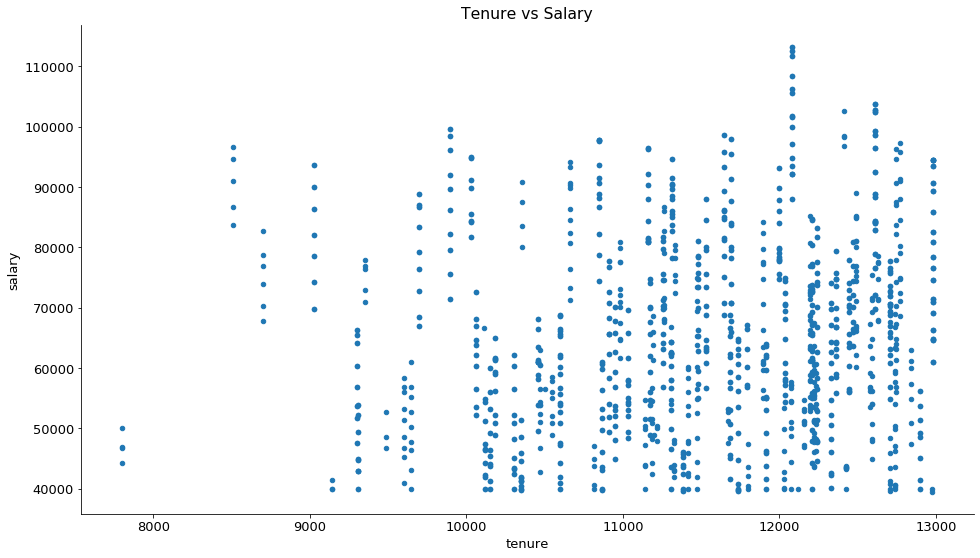

In [95]:
e_w_s_t.plot.scatter('tenure', 'salary')
plt.title('Tenure vs Salary')

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [78]:
sleep = data('sleepstudy')
df = pd.DataFrame(sleep)